**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: Luis Fernando Caporal Montes de Oca
*   MATRÍCULA: A01795898

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [3]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
insurance_df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


1b) Búsqueda de valores faltantes.

In [5]:
""" Descipción de los datos, valores faltantes y dimensión"""
rows, cols = insurance_df.shape
print(f'Contamos con {cols} columnas y {rows} observaciones.')
print('')
insurance_df.info()

Contamos con 7 columnas y 1338 observaciones.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
for column in insurance_df.columns:
    print(f'{column}: {round(sum(insurance_df[column].isna())*100/rows,2)}% faltantes')

age: 0.0% faltantes
sex: 0.0% faltantes
bmi: 0.0% faltantes
children: 0.0% faltantes
smoker: 0.0% faltantes
region: 0.0% faltantes
charges: 0.0% faltantes


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

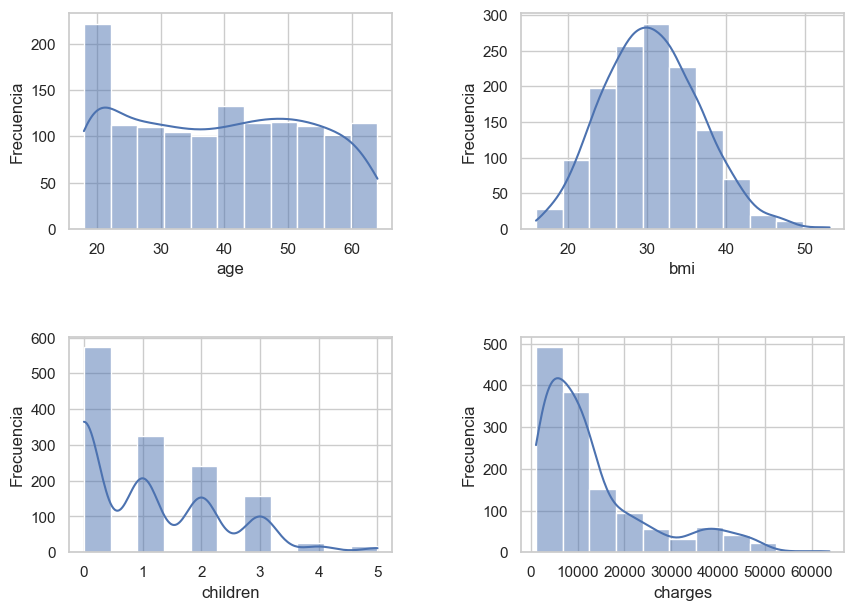

In [7]:
def sturges_rule(col):
    n = len(col)
    k = 1 + np.log2(n)
    return int(k)

num_cols = ['age', 'bmi', 'children', 'charges']
sns.set(style='whitegrid')
fig, axs = plt.subplots(2,2,figsize=(10,7))

idx = 0
for i in range(0,2):
    for j in range(0,2):
        sns.histplot(insurance_df[num_cols[idx]], kde=True, 
                     bins=sturges_rule(insurance_df[num_cols[idx]]) ,ax=axs[i,j])
        axs[i,j].set_ylabel('Frecuencia')
        idx += 1

fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

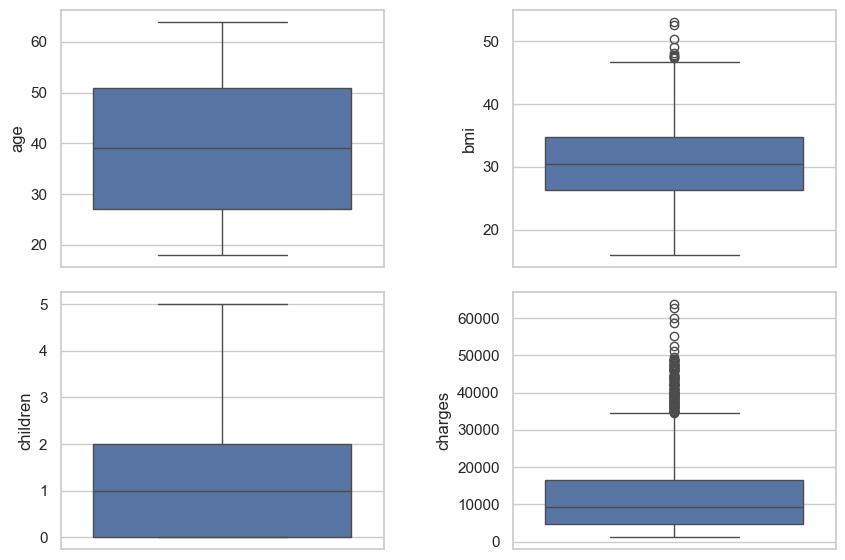

In [8]:
fig, axs = plt.subplots(2,2,figsize=(10,7))

idx = 0
for i in range(0,2):
    for j in range(0,2):
        sns.boxplot(y=num_cols[idx], data=insurance_df ,ax=axs[i,j])
        idx += 1

fig.subplots_adjust(hspace=0.1, wspace=0.4)
plt.show()

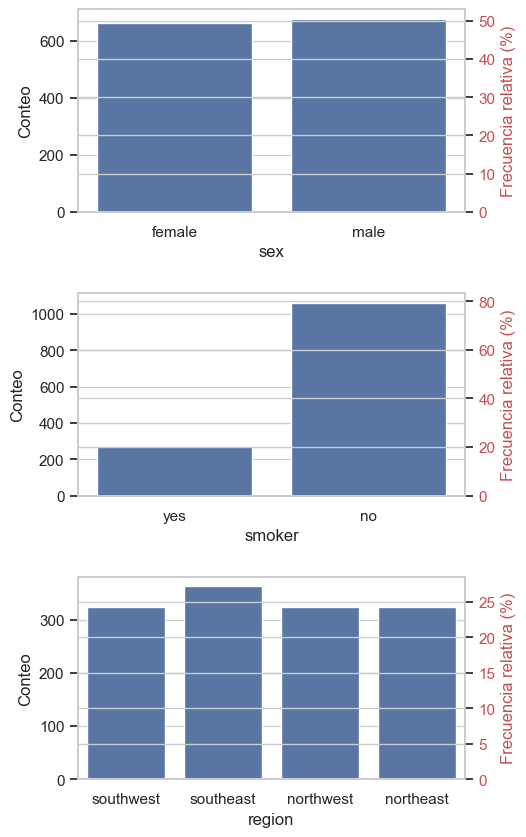

In [9]:
def second_axis(axis, col, df=insurance_df):
    """ Voy a crear una función para ver la frecuencia en un eje a la derecha"""
    global rows
    global cereals_df
    ax2 = axis.twinx()
    f = df[col].value_counts(normalize=True) * 100
    limit = max(f) * 1.05
    ax2.set_ylim(0, limit)
    ax2.set_ylabel('Frecuencia relativa (%)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    return ax2


cat_cols = ['sex', 'smoker', 'region']

fig, axs = plt.subplots(3,1,figsize=(5,10))

for idx in range(0,3):
    
    sns.countplot(x=cat_cols[idx], data=insurance_df, ax=axs[idx])
    axs[idx].set_ylabel('Conteo')
    ax2_0 = second_axis(axs[idx], cat_cols[idx])

fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [10]:
def get_relative_freq(agrouped, percentage=False):
    if percentage:
        agrouped['Porcentaje'] = agrouped['Cuentas']*100 / agrouped['Cuentas'].sum()
    else:
        agrouped['Frecuencia Relativa'] = agrouped['Cuentas'] / agrouped['Cuentas'].sum()
    return agrouped

result_1 = insurance_df['sex'].value_counts().reset_index(name='Cuentas').rename(columns={'index': 'sex'})
result_1 = get_relative_freq(result_1)

result_2 = insurance_df['smoker'].value_counts().reset_index(name='Cuentas').rename(columns={'index': 'smoker'})
result_2 = get_relative_freq(result_2)

result_3 = insurance_df['region'].value_counts().reset_index(name='Cuentas').rename(columns={'index': 'region'})
result_3 = get_relative_freq(result_3)

print(result_1)
print('')
print(result_2)
print('')
print(result_3)

      sex  Cuentas  Frecuencia Relativa
0    male      676             0.505232
1  female      662             0.494768

  smoker  Cuentas  Frecuencia Relativa
0     no     1064             0.795217
1    yes      274             0.204783

      region  Cuentas  Frecuencia Relativa
0  southeast      364             0.272048
1  southwest      325             0.242900
2  northwest      325             0.242900
3  northeast      324             0.242152


Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

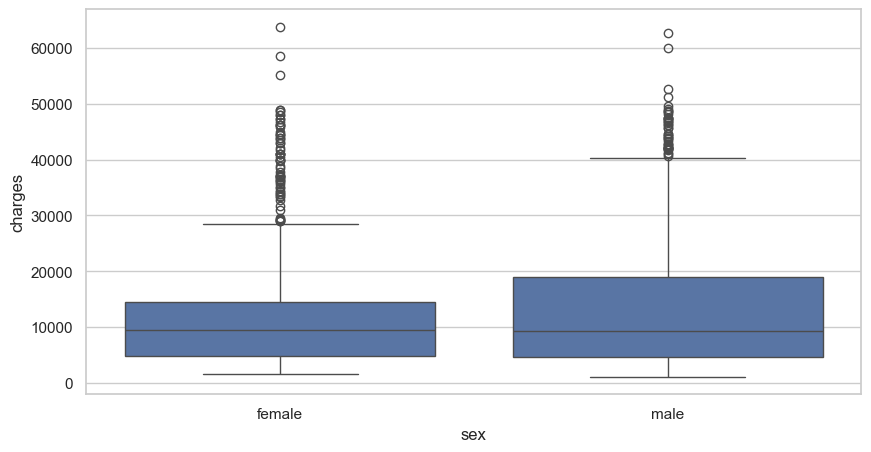

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(y='charges', x='sex', data=insurance_df)
plt.show()

Visualente no se aprecia ninguna diferencia pues sus medianas son muy cercanas entre sí, para asegurarnos de ellos, comprobemos si hay diferencia significativa entre ambos grupos para la cariable charges.


* Hipótesis nula (H_0): No hay diferencias significativas entre las medias charges de los dos sexos.
* Hipótesis alternativa (H1): Hay diferencias significativas entre las medias charges de los dos sexos


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway


""" OPción 1 """
# Ajustar modelo lineal ( proporciona un marco estructurado y es la forma estándar de realizar un ANOVA )
modelo = ols('charges ~ C(sex)', data=insurance_df[['sex', 'charges']]).fit()
anova_resultado = sm.stats.anova_lm(modelo, typ=2)
print(anova_resultado)
print('')
""" Opción 2 """
# Anova sobre los datos directamente
grupos = [insurance_df['charges'][insurance_df['sex'] == categoria] for categoria in insurance_df['sex'].unique()]
f_stat, p_val = f_oneway(*grupos)

print(f"Estadístico F: {f_stat}")
print(f"P-valor: {p_val}")

                sum_sq      df         F    PR(>F)
C(sex)    6.435902e+08     1.0  4.399702  0.036133
Residual  1.954306e+11  1336.0       NaN       NaN

Estadístico F: 4.3997016974374565
P-valor: 0.03613272100592722


### Sí hay diferencia significativa

El anova mostró que la inspección visual se queda corta para saber si existe diferencia significativa, pues considerando un nivel significancia 

$$ \alpha = 5 \% $$ 

El valor p resulto más pequeño 0.036 < 0.05, por lo que podemos descartar la hipotesis nula y aceptar la alternativa

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

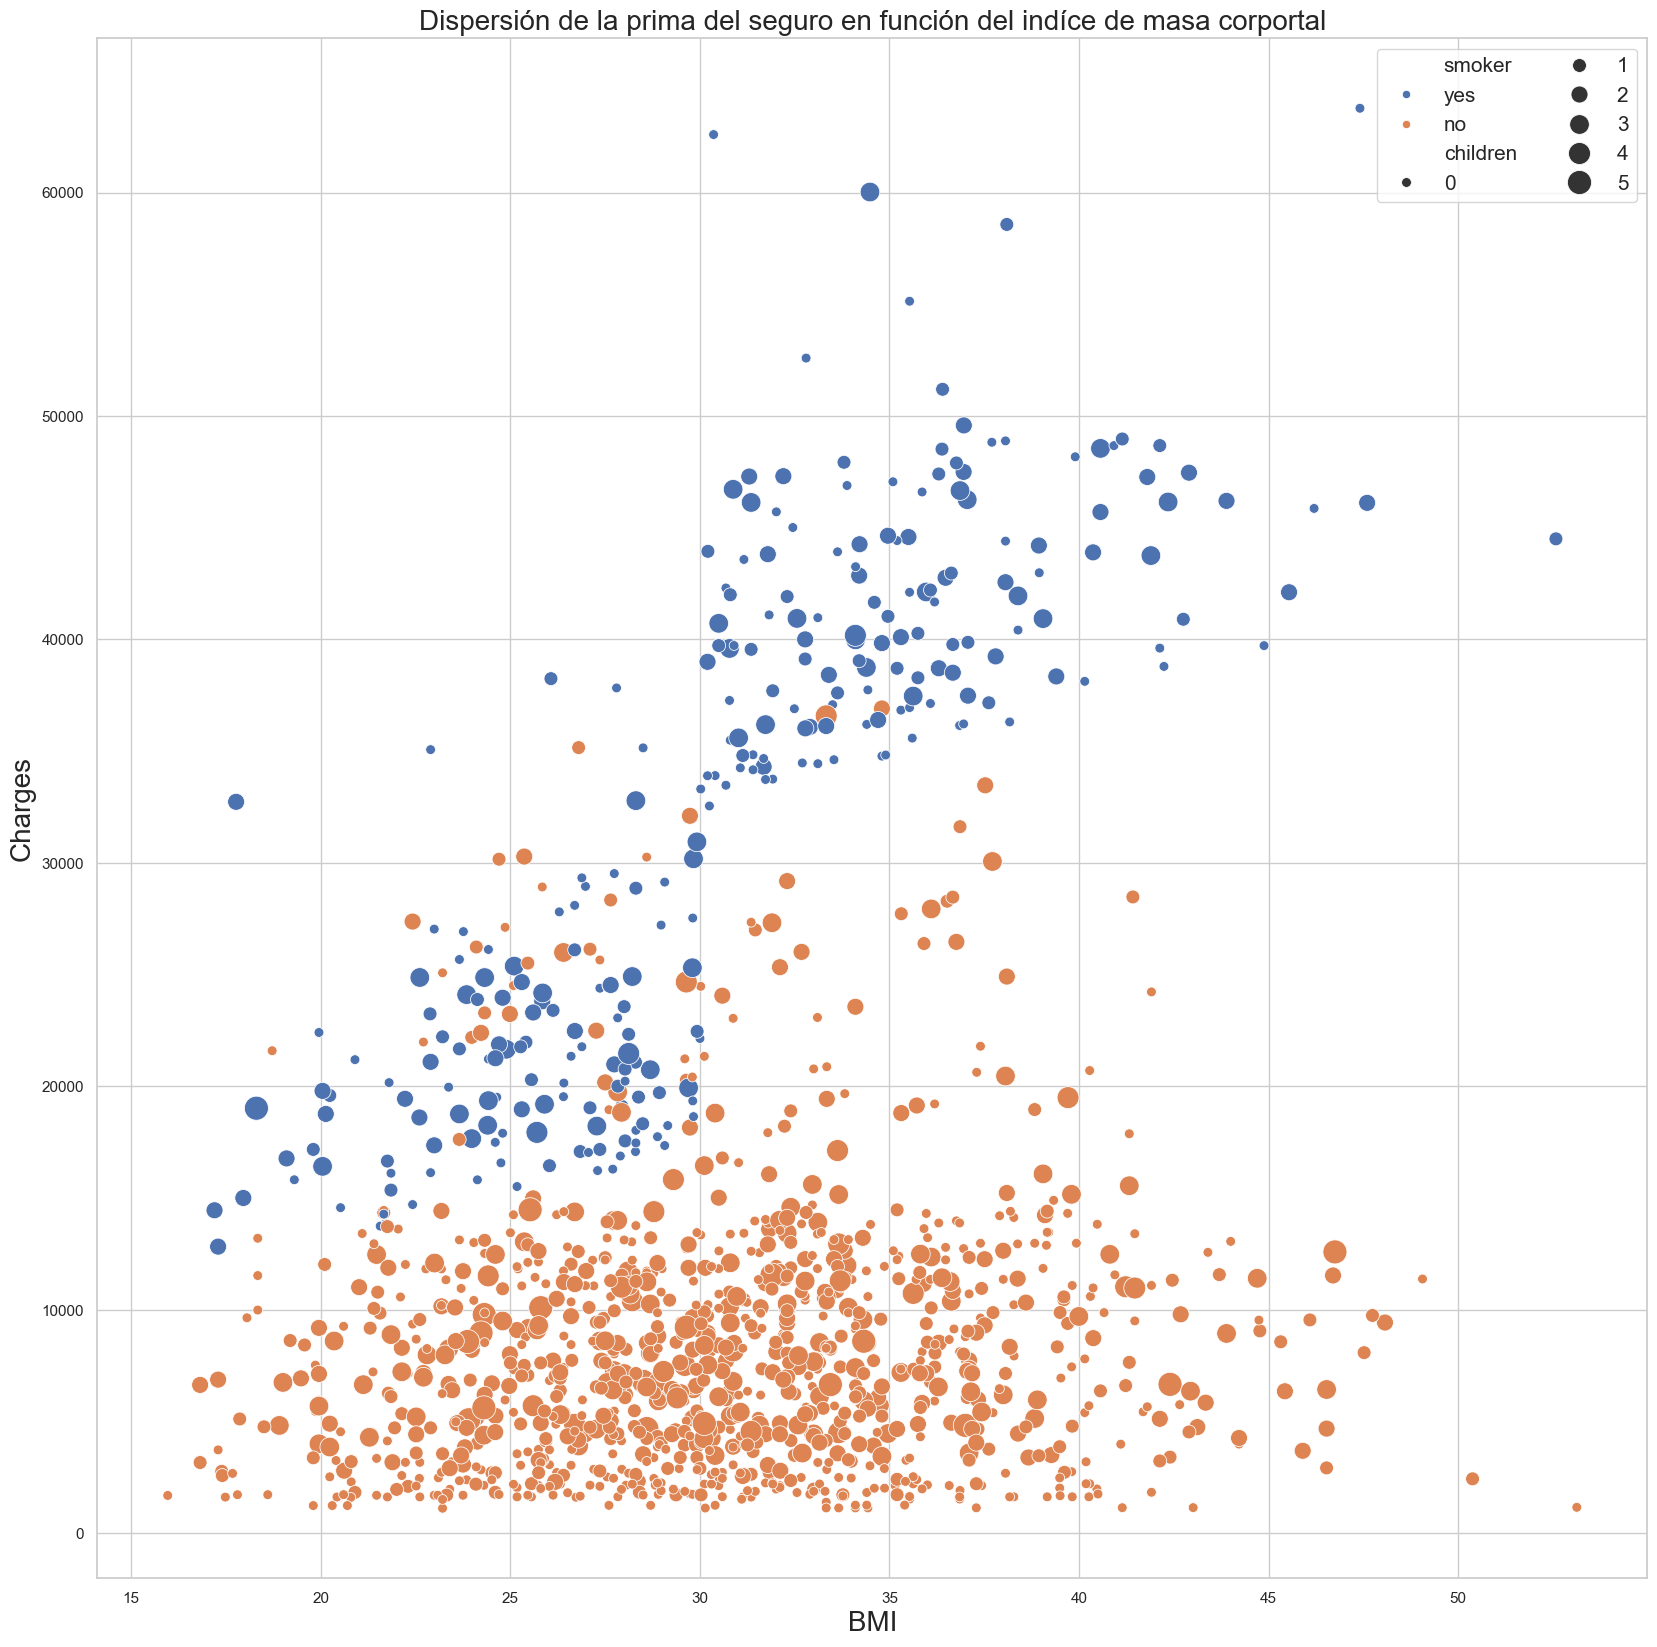

In [13]:
""" De acuerdo a la estadistica descritiva de children, el min es de 0 y el maximo de 5"""
""" Mapiemos dichos valores con size = 50*children + 50 para no asignar un tamaño de 0 cuando children = 0""" 

plt.figure(figsize=(20,20))
sns.scatterplot(y='charges', x='bmi', hue='smoker', size='children', sizes=(50, 50*5 + 50), data=insurance_df)
plt.xlabel('BMI', fontsize=20)
plt.ylabel('Charges', fontsize=20)
plt.title('Dispersión de la prima del seguro en función del indíce de masa corportal', fontsize=20)
plt.legend(fontsize=15, ncols=2)
plt.show()

Es claro que existe una distición pues los fumadores (azul), deben de pagar una prima de seguro mucho mayor que los que no fuman. Por otro lado el número de hijos no parece ser importante en el pago de dicho servicio, al menos no según lo que se aprecia en la distribución

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

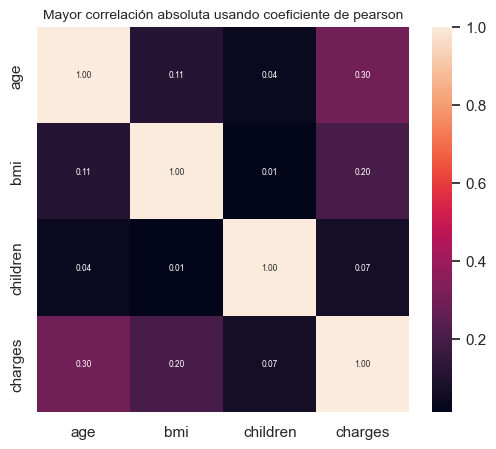

In [14]:
correlation = insurance_df.corr(method='pearson').abs()

plt.figure(figsize=(6,5))

sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, 
            annot=True, fmt=".2f", annot_kws={"fontsize": 6})

plt.title('Mayor correlación absoluta usando coeficiente de pearson', fontsize=10)

plt.show()


Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [15]:
Q_1 = insurance_df['charges'].quantile(0.25)
Q_3 = insurance_df['charges'].quantile(0.75)
IQR = Q_3 - Q_1

lower = Q_1 - IQR*1.5
upper = Q_3 + IQR*1.5


charges_outliers = insurance_df[(insurance_df['charges'] < lower) | (insurance_df['charges'] > upper)]
charges_outliers.reset_index(drop=True, inplace=True)
charges_outliers

,age,sex,bmi,children,smoker,region,charges
0,27,male,42.130,0,yes,southeast,39611.75770
1,30,male,35.300,0,yes,southwest,36837.46700
2,34,female,31.920,1,yes,northeast,37701.87680
3,31,male,36.300,2,yes,southwest,38711.00000
4,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
134,45,male,30.360,0,yes,southeast,62592.87309
135,62,male,30.875,3,yes,northwest,46718.16325
136,43,male,27.800,0,yes,southwest,37829.72420
137,19,female,34.700,2,yes,southwest,36397.57600


Promedio de age en el set de outliers: 41.079
Promedio de bmi en el set de outliers: 35.565


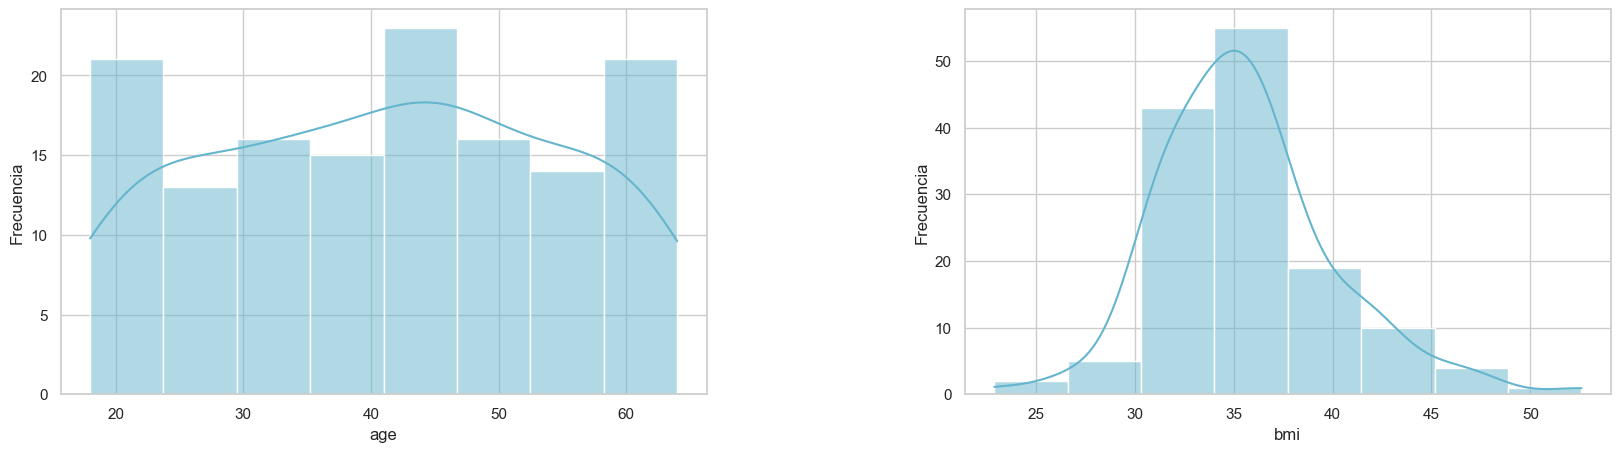

In [16]:
print(f"Promedio de age en el set de outliers: {round(charges_outliers['age'].mean(),3)}")
print(f"Promedio de bmi en el set de outliers: {round(charges_outliers['bmi'].mean(),3)}")

columns = ['age', 'bmi']
fig, axs = plt.subplots(1,2,figsize=(20,5))
for i in range(0,2):
    sns.histplot(charges_outliers[columns[i]], kde=True, 
                 bins=sturges_rule(charges_outliers[columns[i]]) ,ax=axs[i], color='c')
    axs[i].set_ylabel('Frecuencia')
    idx += 1

fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

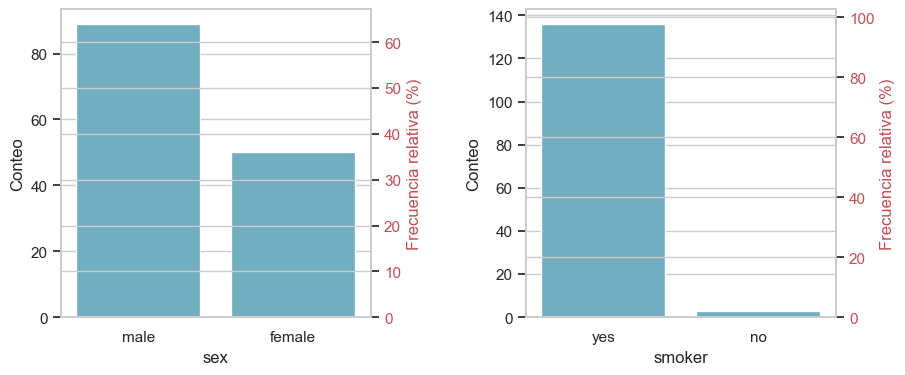

      sex  Cuentas  Porcentaje
0    male       89   64.028777
1  female       50   35.971223

  smoker  Cuentas  Porcentaje
0    yes      136   97.841727
1     no        3    2.158273


In [17]:
columns = ['sex', 'smoker']
fig, axs = plt.subplots(1,2,figsize=(10,4))

for idx in range(0,2):
    
    sns.countplot(x=columns[idx], data=charges_outliers, ax=axs[idx], color='c')
    axs[idx].set_ylabel('Conteo')
    ax2_0 = second_axis(axs[idx], cat_cols[idx], charges_outliers)

fig.subplots_adjust(hspace=0.4, wspace=0.5)
plt.show()

result_1 = charges_outliers['sex'].value_counts().reset_index(name='Cuentas').rename(columns={'index': 'sex'})
result_1 = get_relative_freq(result_1, percentage=True)

result_2 = charges_outliers['smoker'].value_counts().reset_index(name='Cuentas').rename(columns={'index': 'smoker'})
result_2 = get_relative_freq(result_2, percentage=True)


print(result_1)
print('')
print(result_2)

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [18]:
y = insurance_df['charges']
X = insurance_df.drop('charges', axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [19]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1,
                                               stratify=insurance_df['smoker'])

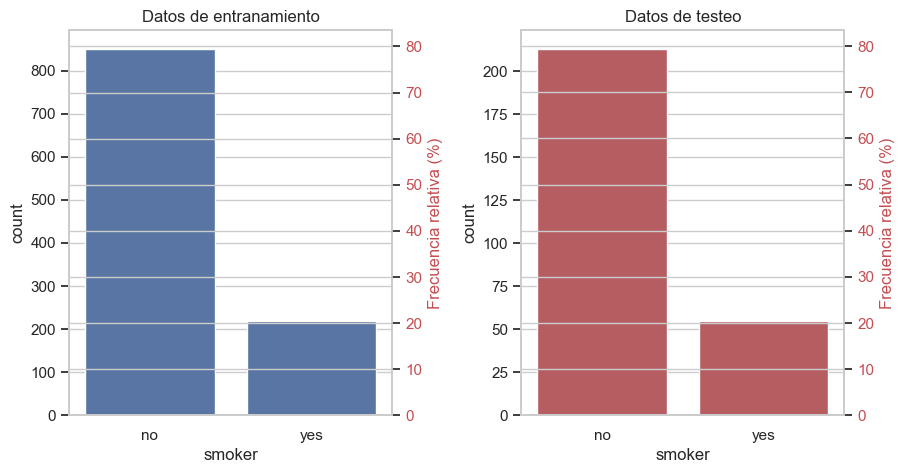

In [20]:
# Nos aseguramos que la estratificación funciono para mantener la proporción en entrenamiento y prueba

fig, axs = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='smoker', data=Xtrain, ax=axs[0])
axs[0].set_title('Datos de entranamiento')
ax2_0 = second_axis(axs[0], 'smoker', Xtrain)

sns.countplot(x='smoker', data=Xtest, ax=axs[1], color='r')
axs[1].set_title('Datos de testeo')
fig.subplots_adjust(hspace=0.0, wspace=0.4)
ax2_1 = second_axis(axs[1], 'smoker', Xtest)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [21]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

# En realidad hay que hacer dos transformadores y luego fusionarlos con el column transformer

numerical_pipeline = Pipeline([
    ("standarsize", MinMaxScaler()),
])
categorical_pipeline = Pipeline([
    ("encoding", OneHotEncoder()),
])

preprocessing = make_column_transformer(
    (numerical_pipeline, make_column_selector(dtype_include=np.number)),
    (categorical_pipeline, make_column_selector(dtype_include=object)),
)

preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standarsize',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1479b1650>),
                                ('pipeline-2',
                                 Pipeline(steps=[('encoding',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x164ff3850>)])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [22]:
from sklearn.linear_model import LinearRegression

lr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),  # Transformador de preprocesamiento
    ('regression', LinearRegression())  # Modelo de regresión lineal
])

lr_model.fit(Xtrain, ytrain) # Ajustamos el modelo
lr_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standarsize',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1479b1650>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x164ff3850>)])),
                ('regression', LinearRegression())])

In [23]:
from sklearn.metrics import root_mean_squared_error, r2_score

y_predicted = lr_model.predict(Xtest) # Se evalua el modelo sobre los datos de prueba
rmse = root_mean_squared_error(ytest, y_predicted)  

# Calcular R cuadrado
r2 = r2_score(ytest, y_predicted)

# Imprimir los resultados
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Métrica R cuadrado (R^2):", r2)

Raíz del Error Cuadrático Medio (RMSE): 5698.759784532354
Métrica R cuadrado (R^2): 0.7538547215244327


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [24]:
Q_1 = insurance_df['charges'].quantile(0.25)
Q_3 = insurance_df['charges'].quantile(0.75)
IQR = Q_3 - Q_1

lower = Q_1 - IQR*1.5
upper = Q_3 + IQR*1.5

ytrain[(ytrain>upper) | (ytrain<lower)] = upper
ytest[(ytest>upper) | (ytest<lower)] = upper

lr_model2 = Pipeline(steps=[
    ('preprocessing', preprocessing),  
    ('regression', LinearRegression()) 
])

lr_model2.fit(Xtrain, ytrain) # Ajustamos el modelo
lr_model2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standarsize',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1479b1650>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x164ff3850>)])),
                ('regression', LinearRegression())])

In [25]:
y_predicted = lr_model2.predict(Xtest) 
rmse = root_mean_squared_error(ytest, y_predicted)  

r2 = r2_score(ytest, y_predicted)

print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Métrica R cuadrado (R^2):", r2)

Raíz del Error Cuadrático Medio (RMSE): 4812.061728319818
Métrica R cuadrado (R^2): 0.7637776364359085


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [26]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder


numerical_pipeline2 = StandardScaler()
categorical_pipeline2 = OrdinalEncoder()

preprocessing2 = make_column_transformer(
    (numerical_pipeline2, make_column_selector(dtype_include=np.number)),
    (categorical_pipeline2, make_column_selector(dtype_include=object)),
)

lr_model3 = Pipeline(steps=[
    ('preprocessing', preprocessing2),  
    ('regression', LinearRegression()) 
])

lr_model3.fit(Xtrain, ytrain) # Ajustamos el modelo
lr_model3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x164fe97d0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x164f9b8d0>)])),
                ('regression', LinearRegression())])

In [27]:
y_predicted = lr_model3.predict(Xtest) 
rmse = root_mean_squared_error(ytest, y_predicted)  

r2 = r2_score(ytest, y_predicted)

print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Métrica R cuadrado (R^2):", r2)

Raíz del Error Cuadrático Medio (RMSE): 4811.600670456454
Métrica R cuadrado (R^2): 0.7638229005936742


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [28]:
# Creo mi propio estimador y tranformador que sea ajustable al grado de polinomio
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures


class PreprocessingAndPolynomialTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, preprocessing_pipeline, degree=2):
        self.preprocessing_pipeline = preprocessing_pipeline
        self.degree = degree
        self.poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    def fit(self, X, y=None):
        self.preprocessing_pipeline.fit(X, y)
        return self
    
    def transform(self, X):
        try:
            preprocessed_features = self.preprocessing_pipeline.transform(X)
        except NotFittedError:
            raise NotFittedError("The preprocessing pipeline is not fitted. "
                                 "Call 'fit' with appropriate arguments before using this transformer.")
        
        poly_features = self.poly.fit_transform(preprocessed_features)
        return poly_features

    
""" Además construyo la siguiente función que permite versatilidad """ 
""" Tanto para tipo de escalamiento, codificación, como de grado polinomial """
def get_transformer(numerical_trans, categorical_trans, degree, X_train, y_train):
    

    preprocessing = make_column_transformer(
        (numerical_trans, make_column_selector(dtype_include=np.number)),
        (categorical_trans, make_column_selector(dtype_include=object)),
    )

    preprocessing_and_polynomial_transformer = PreprocessingAndPolynomialTransformer(preprocessing, degree=degree)

    # Definir un nuevo pipeline con el transformador personalizado y el modelo de regresión lineal
    lr_model4 = Pipeline(steps=[
        ('preprocessing_and_polynomial', preprocessing_and_polynomial_transformer),
        ('regression', LinearRegression()) 
    ])

    lr_model4.fit(X_train, y_train)
    
    return lr_model4

In [29]:
# Tipos de escaladores = StandardScaler() | MinMaxScaler()
# Tipos de codificación = OneHotEncoder() | OrdinalEncoder() | OneHotEncoder(drop='first')

lr_model4 = get_transformer(numerical_trans = StandardScaler(), 
                            categorical_trans = OrdinalEncoder(),
                            degree = 2,
                            X_train = Xtrain, y_train = ytrain
                           )

lr_model4

Pipeline(steps=[('preprocessing_and_polynomial',
                 PreprocessingAndPolynomialTransformer(preprocessing_pipeline=ColumnTransformer(transformers=[('standardscaler',
                                                                                                               StandardScaler(),
                                                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x164f9c410>),
                                                                                                              ('ordinalencoder',
                                                                                                               OrdinalEncoder(),
                                                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x165733c50>)]))),
                ('regression', LinearRegression())])

In [30]:
y_predicted = lr_model4.predict(Xtest) 
rmse = root_mean_squared_error(ytest, y_predicted)  

r2 = r2_score(ytest, y_predicted)

print("Raíz del Error Cuadrático Medio (RMSE):", rmse)
print("Métrica R cuadrado (R^2):", r2)

Raíz del Error Cuadrático Medio (RMSE): 4285.57031096556
Métrica R cuadrado (R^2): 0.8126404302016094


| Intento |  Escalamiento | Codificación | Grado Polinomial | RMSE | $$R^2$$ | 
|-----------|-----------|-----------|-----------|-----------|-----------|
| 1 | StandardScaler | OrdinalEncoder | 2 | 4285.57 | 0.8126 |
| 2 | StandardScaler | OrdinalEncoder | 3 | 4377.20 | 0.8045 |
| 3 | StandardScaler | OrdinalEncoder | 4 | 4822.88 | 0.7627 |
| 4 | StandardScaler | OneHotEncoder | 2 | 4314.53 | 0.8100 |
| 5 | StandardScaler | OneHotEncoder | 3 | 4446.74 | 0.7982 |
| 6 | StandardScaler | OneHotEncoder | 4 | 5690.16 | 0.6697 |
| 7 | MinMaxScaler | OneHotEncoder | 2 | 4316.68 | 0.8099 |
| 8 | MinMaxScaler | OneHotEncoder | 3 | 4429.41 | 0.7998 |
| 9 | MinMaxScaler | OneHotEncoder | 4 | 5939.46 | 0.6401 |
| 10 | MinMaxScaler | OrdinalEncoder | 2 | 4285.57 | 0.8126 |
| 11 | MinMaxScaler | OrdinalEncoder | 3 | 4377.17 | 0.8045 |
| 12 | MinMaxScaler | OrdinalEncoder | 4 | 4821.87 | 0.7628 |


Después de diversas iteraciones combinando escalador, codificador y grado del ajuste polinomial, la regresión polinómial que mejores resultados mostró fue la de grado 2 con OrdinalEncoder y StandardScaler